# Bird Species Recognition

Data set of 285 bird species.40930 training images, 1425 test images(5 images per species) and 1425 validation images(5 images per species.
All images are 224 X 224 X 3 color images in jpg format. Data set includes a train set, test set and validation set. Each set contains 285 sub directories, one for each bird species. The data structure is convenient if you use the Keras ImageDataGenerator.flowfromdirectory to create your train, test and valid data generators. 

The data set also include a file Bird Species.csv. This cvs file contains three columns. The filepaths column contains the file path to an image file. The labels column contains the class name associated with the image file. The Bird Species.csv file if read in using df= pandas.birdscsv(Bird Species.csv) will create a pandas dataframe which then can be split into traindf, testdf and validdf dataframes to create your own partitioning of the data into train, test and valid data sets

![IMG](https://github.com/Hrushi11/Bird-Species-Recognition/blob/main/images/random_img_crp.jpg?raw=true)

In [ ]:
from google.colab import files
files.upload()

## Getting data using Kaggle API

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gpiosenka/100-bird-species

100% 2.82G/2.83G [00:59<00:00, 53.1MB/s]
100% 2.83G/2.83G [00:59<00:00, 50.6MB/s]


In [ ]:
# downloading helper_functions.py
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2021-08-22 07:25:41--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2021-08-22 07:25:41 (64.9 MB/s) - ‘helper_functions.py’ saved [10139/10139]



## Importing dependancies

In [ ]:
# Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves, compare_historys, make_confusion_matrix

## Getting our data ready

In [ ]:
unzip_data("/content/100-bird-species.zip")

### Deleting unneccesory files

In [ ]:
# To delete the zip file
!rm 100-bird-species.zip

# To delete extra folders
!rm -rf 285-birds # add '-' in folder name
!rm -rf birds_rev2

rm: cannot remove '100-bird-species.zip': No such file or directory


### Walkthrough

In [ ]:
walk_through_dir("/content/birds")

There are 3 directories and 1 images in '/content/birds'.
There are 275 directories and 0 images in '/content/birds/test'.
There are 0 directories and 5 images in '/content/birds/test/SPOON BILED SANDPIPER'.
There are 0 directories and 5 images in '/content/birds/test/RED FACED WARBLER'.
There are 0 directories and 5 images in '/content/birds/test/UMBRELLA BIRD'.
There are 0 directories and 5 images in '/content/birds/test/COMMON POORWILL'.
There are 0 directories and 5 images in '/content/birds/test/CROW'.
There are 0 directories and 5 images in '/content/birds/test/BALD EAGLE'.
There are 0 directories and 5 images in '/content/birds/test/ENGGANO MYNA'.
There are 0 directories and 5 images in '/content/birds/test/BANDED BROADBILL'.
There are 0 directories and 5 images in '/content/birds/test/GOLDEN PIPIT'.
There are 0 directories and 5 images in '/content/birds/test/ANNAS HUMMINGBIRD'.
There are 0 directories and 5 images in '/content/birds/test/PUFFIN'.
There are 0 directories and 5 

In [ ]:
walk_through_dir("/content/birds/train")

There are 275 directories and 0 images in '/content/birds/train'.
There are 0 directories and 144 images in '/content/birds/train/SPOON BILED SANDPIPER'.
There are 0 directories and 167 images in '/content/birds/train/RED FACED WARBLER'.
There are 0 directories and 144 images in '/content/birds/train/UMBRELLA BIRD'.
There are 0 directories and 161 images in '/content/birds/train/COMMON POORWILL'.
There are 0 directories and 107 images in '/content/birds/train/CROW'.
There are 0 directories and 160 images in '/content/birds/train/BALD EAGLE'.
There are 0 directories and 124 images in '/content/birds/train/ENGGANO MYNA'.
There are 0 directories and 194 images in '/content/birds/train/BANDED BROADBILL'.
There are 0 directories and 113 images in '/content/birds/train/GOLDEN PIPIT'.
There are 0 directories and 139 images in '/content/birds/train/ANNAS HUMMINGBIRD'.
There are 0 directories and 124 images in '/content/birds/train/PUFFIN'.
There are 0 directories and 166 images in '/content/bi

In [ ]:
# labels of the images
classes = []
for dir in os.listdir("/content/birds/train/"):
  classes.append(dir)

len(classes)

275

### Classes

In [ ]:
classes = np.array(classes)
classes

array(['SPOON BILED SANDPIPER', 'RED FACED WARBLER', 'UMBRELLA BIRD',
       'COMMON POORWILL', 'CROW', 'BALD EAGLE', 'ENGGANO MYNA',
       'BANDED BROADBILL', 'GOLDEN PIPIT', 'ANNAS HUMMINGBIRD', 'PUFFIN',
       'BANANAQUIT', 'MALEO', 'KAKAPO', 'RED WINGED BLACKBIRD',
       'BLACK SWAN', 'ALEXANDRINE PARAKEET', 'CALIFORNIA GULL',
       'DARK EYED JUNCO', 'FRIGATE', 'YELLOW BELLIED FLOWERPECKER',
       'CHARA DE COLLAR', 'OYSTER CATCHER', 'STEAMER DUCK',
       'BARRED PUFFBIRD', 'INDIAN BUSTARD', 'SPANGLED COTINGA',
       'PURPLE SWAMPHEN', 'OCELLATED TURKEY', 'STRAWBERRY FINCH',
       'CALIFORNIA CONDOR', 'ARARIPE MANAKIN', 'NORTHERN CARDINAL',
       'PURPLE GALLINULE', 'RAZORBILL', 'ROBIN', 'COMMON GRACKLE',
       'WHITE CHEEKED TURACO', 'ROSY FACED LOVEBIRD',
       'BLACK THROATED BUSHTIT', 'CAPE MAY WARBLER', 'COMMON FIRECREST',
       'COUCHS KINGBIRD', 'SCARLET MACAW', 'BLACK-CAPPED CHICKADEE',
       'RUFUOS MOTMOT', 'HELMET VANGA', 'EASTERN TOWEE',
       'COMMON STA

## Preprocessing the data

In [ ]:
# Preprocess img function
IMG_SIZE = (224, 224)
def load_and_prep(filepath):
  img_path = tf.io.read_file(filepath)
  img = tf.io.decode_image(img_path)
  img = tf.image.resize(img, IMG_SIZE)

  return img

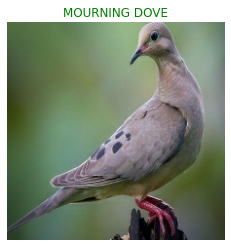

In [ ]:
# Setting up directories
train_dir = "/content/birds/train/"
test_dir = "/content/birds/test/"

# Randomly visualizing images from the train dataset
random_class = random.choice(classes)
random_file_path = train_dir + random_class
random_img_path = random_file_path + "/" + random.choice(os.listdir(random_file_path))
label = random_class

# plotting the image
img = load_and_prep(random_img_path)
plt.imshow(img / 255)
plt.axis(False)
plt.title(label, color="green");

## Randomly viualizing multiple images

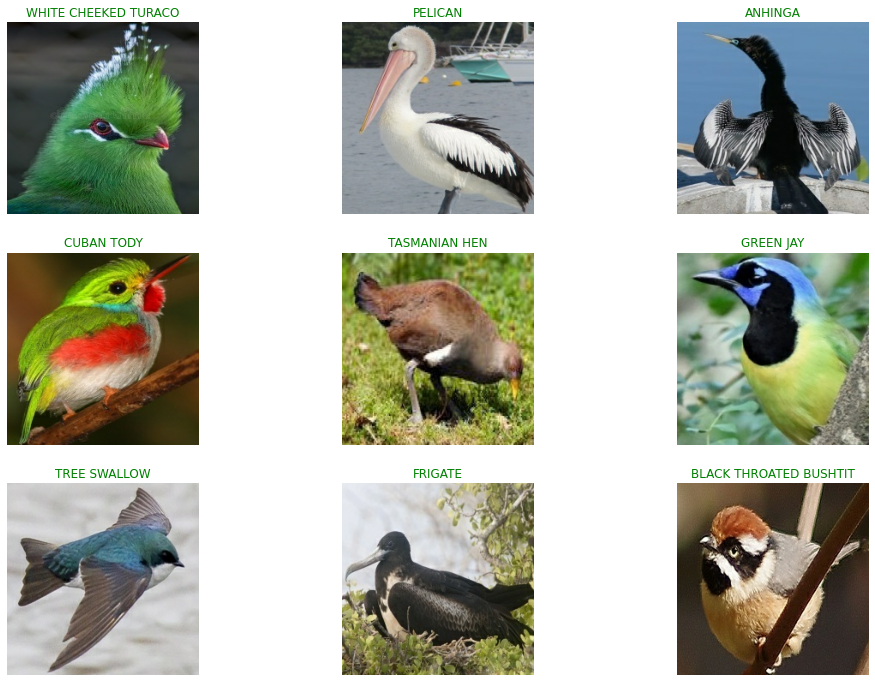

In [ ]:
# Randomly visualizing multiple random images from train dataset
plt.figure(figsize=(17, 12))
for i in range(9):
  random_class = random.choice(classes)
  random_file_path = train_dir + random_class
  random_img_path = random_file_path + "/" + random.choice(os.listdir(random_file_path))
  label = random_class

  # plot 
  img = load_and_prep(random_img_path)
  plt.subplot(3, 3, i+1)
  plt.imshow(img / 255.)
  plt.axis(False)
  plt.title(label, color="green");

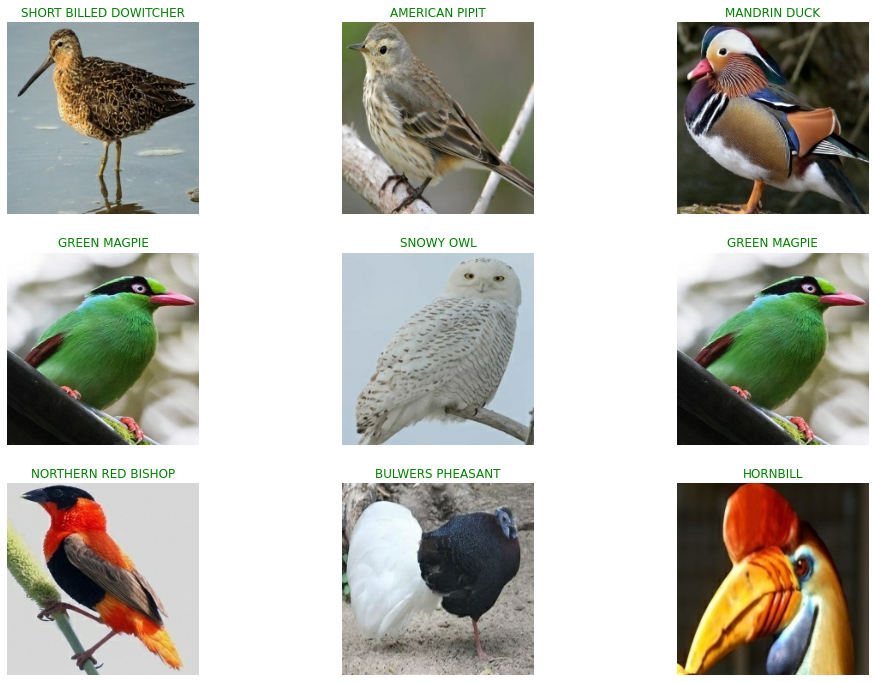

In [ ]:
# Randomly visualizing multiple random images from test dataset
plt.figure(figsize=(17, 12))
for i in range(9):
  random_class = random.choice(classes)
  random_file_path = test_dir + random_class
  random_img_path = random_file_path + "/" + random.choice(os.listdir(random_file_path))
  label = random_class

  # Plotting the images 
  img = load_and_prep(random_img_path)
  plt.subplot(3, 3, i+1)
  plt.imshow(img / 255.)
  plt.axis(False)
  plt.title(label, color="green");

## Data Augmentation layer

In [ ]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

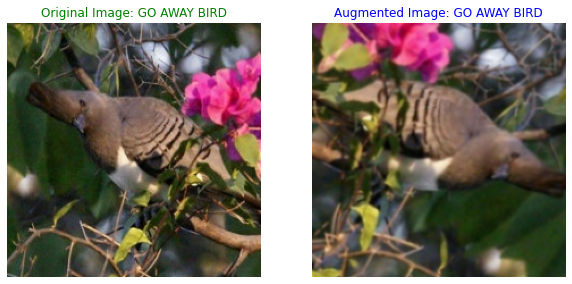

In [ ]:
# Visualizing random augmented image
random_class = random.choice(classes)
random_file_path = train_dir + random_class
random_img_path = random_file_path + "/" + random.choice(os.listdir(random_file_path))

img = load_and_prep(random_img_path)
aug_img = data_augmentation(tf.expand_dims(img, axis=0))
aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

plt.figure(figsize=(10, 7))
# Plotting orignal image
plt.subplot(1, 2, 1)
plt.axis(False)
plt.imshow(img / 255)
plt.title(f"Original Image: {random_class}", color="green")

# Plotting augmented image
plt.subplot(1, 2, 2)
plt.axis(False)
plt.imshow(aug_img / 255)
plt.title(f"Augmented Image: {random_class}", color="blue");

## Visualizing multiple augmented images

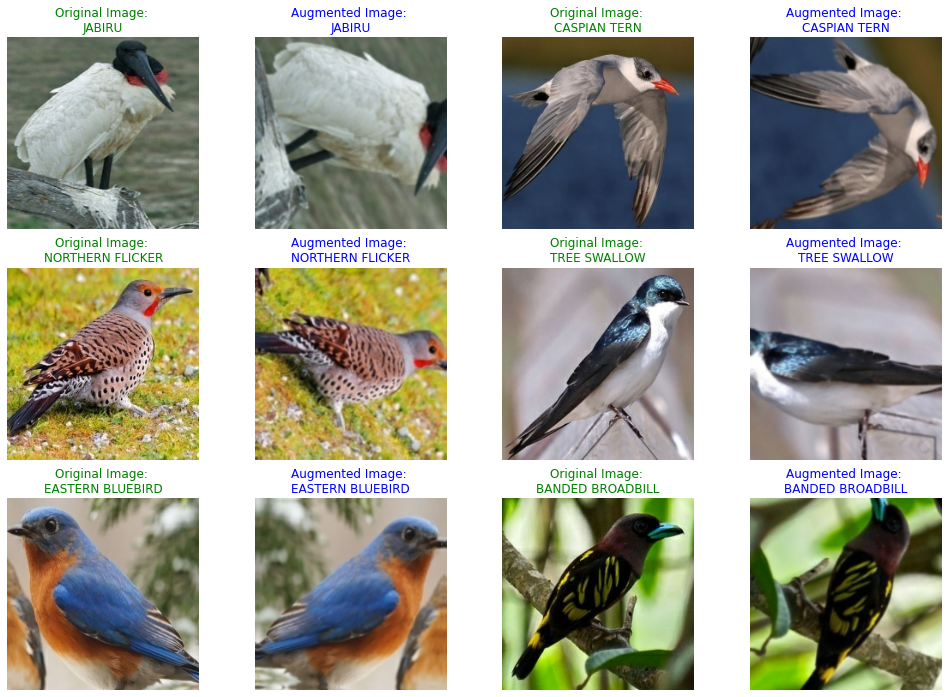

In [ ]:
# Visualizing multiple randomly augmented images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  random_class = random.choice(classes)
  random_file_path = train_dir + random_class
  random_img_path = random_file_path + "/" + random.choice(os.listdir(random_file_path))

  img = load_and_prep(random_img_path)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

  # Plotting original image
  plt.subplot(3, 4, i)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title(f"Original Image: \n{random_class}", color="green")

  # Plotting augmented image
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(aug_img / 255)
  plt.title(f"Augmented Image: \n{random_class}", color="blue");

In [ ]:
# Setting up data generator
data_gen = ImageDataGenerator()

## Setting up data 

In [ ]:
# Setting up train test and validation data
train_data = data_gen.flow_from_directory("/content/birds/train",
                                          IMG_SIZE,
                                          seed=42)

valid_data = data_gen.flow_from_directory("/content/birds/valid",
                                          IMG_SIZE,
                                          seed=42)

Found 39364 images belonging to 275 classes.
Found 1375 images belonging to 275 classes.


In [ ]:
len(train_data), len(valid_data)

(1231, 43)

## Model 1

In [ ]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting input layer 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/5
1231/1231 [==============================] - 275s 195ms/step - loss: 1.4926 - accuracy: 0.7296 - val_loss: 0.3233 - val_accuracy: 0.9535
Epoch 2/5
1231/1231 [==============================] - 163s 132ms/step - loss: 0.5062 - accuracy: 0.8880 - val_loss: 0.1742 - val_accuracy: 0.9680
Epoch 3/5
1231/1231 [==============================] - 135s 109ms/step - loss: 0.3718 - accuracy: 0.9117 - val_loss: 0.1465 - val_accuracy: 0.9702
Epoch 4/5
1231/1231 [==============================] - 123s 100ms/step - loss: 0.2968 - accuracy: 0.9267 - val_loss: 0.1161 - val_accuracy: 0.9724
Epoch 5/5
1231/1231 [==============================] - 115s 93ms/step - loss: 0.2503 - accuracy: 0.9377 - val_loss: 0.1046 - val_accuracy: 0.9767


### Loss curves

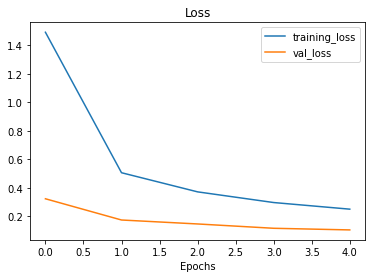

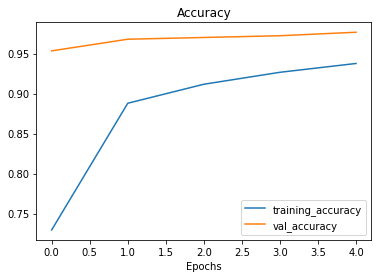

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(test_data)

43/43 [==============================] - 3s 75ms/step - loss: 0.0913 - accuracy: 0.9811


[0.09126093983650208, 0.9810909032821655]

## Saving and loading the model

In [ ]:
# model_1.save("/content/drive/MyDrive/Bird-Species-Recognition")
model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Bird-Species-Recognition")

## Working with the test data

In [ ]:
test_data = data_gen.flow_from_directory("/content/birds/test",
                                         IMG_SIZE,
                                         seed=42)

Found 1375 images belonging to 275 classes.


In [ ]:
# setting up test files
test_filepaths = test_data.filepaths
test_filepaths[:20]

['/content/birds/test/AFRICAN CROWNED CRANE/1.jpg',
 '/content/birds/test/AFRICAN CROWNED CRANE/2.jpg',
 '/content/birds/test/AFRICAN CROWNED CRANE/3.jpg',
 '/content/birds/test/AFRICAN CROWNED CRANE/4.jpg',
 '/content/birds/test/AFRICAN CROWNED CRANE/5.jpg',
 '/content/birds/test/AFRICAN FIREFINCH/1.jpg',
 '/content/birds/test/AFRICAN FIREFINCH/2.jpg',
 '/content/birds/test/AFRICAN FIREFINCH/3.jpg',
 '/content/birds/test/AFRICAN FIREFINCH/4.jpg',
 '/content/birds/test/AFRICAN FIREFINCH/5.jpg',
 '/content/birds/test/ALBATROSS/1.jpg',
 '/content/birds/test/ALBATROSS/2.jpg',
 '/content/birds/test/ALBATROSS/3.jpg',
 '/content/birds/test/ALBATROSS/4.jpg',
 '/content/birds/test/ALBATROSS/5.jpg',
 '/content/birds/test/ALEXANDRINE PARAKEET/1.jpg',
 '/content/birds/test/ALEXANDRINE PARAKEET/2.jpg',
 '/content/birds/test/ALEXANDRINE PARAKEET/3.jpg',
 '/content/birds/test/ALEXANDRINE PARAKEET/4.jpg',
 '/content/birds/test/ALEXANDRINE PARAKEET/5.jpg']

In [ ]:
true_test_arr = []
for elem in test_filepaths:
  label = elem.split("/")[4]
  true_test_labels = true_test_arr.append(label)

true_test_arr[100:125]

['BANDED BROADBILL',
 'BANDED BROADBILL',
 'BANDED BROADBILL',
 'BANDED BROADBILL',
 'BANDED BROADBILL',
 'BAR-TAILED GODWIT',
 'BAR-TAILED GODWIT',
 'BAR-TAILED GODWIT',
 'BAR-TAILED GODWIT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN OWL',
 'BARN OWL',
 'BARN OWL',
 'BARN OWL',
 'BARN SWALLOW',
 'BARN SWALLOW',
 'BARN SWALLOW',
 'BARN SWALLOW',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BARRED PUFFBIRD',
 'BARRED PUFFBIRD',
 'BARRED PUFFBIRD',
 'BARRED PUFFBIRD']

In [ ]:
df_test = pd.DataFrame({"filepaths": test_filepaths,
                        "True labels": true_test_arr})

df_test.head()

filepaths            True labels
0  /content/birds/test/AFRICAN CROWNED CRANE/1.jpg  AFRICAN CROWNED CRANE
1  /content/birds/test/AFRICAN CROWNED CRANE/2.jpg  AFRICAN CROWNED CRANE
2  /content/birds/test/AFRICAN CROWNED CRANE/3.jpg  AFRICAN CROWNED CRANE
3  /content/birds/test/AFRICAN CROWNED CRANE/4.jpg  AFRICAN CROWNED CRANE
4  /content/birds/test/AFRICAN CROWNED CRANE/5.jpg  AFRICAN CROWNED CRANE

In [ ]:
df_test.tail()

filepaths              True labels
1370  /content/birds/test/YELLOW HEADED BLACKBIRD/1.jpg  YELLOW HEADED BLACKBIRD
1371  /content/birds/test/YELLOW HEADED BLACKBIRD/2.jpg  YELLOW HEADED BLACKBIRD
1372  /content/birds/test/YELLOW HEADED BLACKBIRD/3.jpg  YELLOW HEADED BLACKBIRD
1373  /content/birds/test/YELLOW HEADED BLACKBIRD/4.jpg  YELLOW HEADED BLACKBIRD
1374  /content/birds/test/YELLOW HEADED BLACKBIRD/5.jpg  YELLOW HEADED BLACKBIRD

In [ ]:
len(df_test)

1375

In [ ]:
test_data_df = data_gen.flow_from_dataframe(df_test,
                                            x_col="filepaths",
                                            y_col="True labels",
                                            shuffle=False)
len(test_data_df)

Found 1375 validated image filenames belonging to 275 classes.


43

## Predicting on test data

In [ ]:
pred_prob = model_1.predict(test_data_df)
pred_prob

array([[9.9941075e-01, 2.9920429e-08, 1.1370213e-08, ..., 3.8718586e-08,
        9.1441244e-08, 2.8301442e-10],
       [9.9973291e-01, 5.9085334e-11, 2.1789726e-09, ..., 1.8176391e-10,
        6.7992483e-09, 8.2576126e-11],
       [9.9978036e-01, 2.6546161e-09, 4.4781725e-09, ..., 4.3104230e-08,
        2.6348534e-08, 1.5350127e-08],
       ...,
       [2.0982929e-08, 7.5287367e-08, 9.5092023e-10, ..., 3.4542260e-04,
        3.2742792e-05, 9.9260145e-01],
       [5.8194716e-09, 3.6814286e-05, 3.8229541e-07, ..., 2.6979256e-05,
        1.5570906e-06, 8.2947415e-01],
       [4.9322918e-10, 1.5191077e-09, 4.0287357e-11, ..., 6.2447219e-07,
        8.6690108e-07, 9.9904555e-01]], dtype=float32)

In [ ]:
pred_indices = pred_prob.argmax(axis=1)
pred_indices

array([  0,   0,   0, ..., 274, 274, 274])

In [ ]:
train_data.class_indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALI STARLING': 17,
 'BALTIMORE ORIOLE': 18,
 'BANANAQUIT': 19,
 'BANDED BROADBILL': 20,
 'BAR-TAILED GODWIT': 21,
 'BARN OWL': 22,
 'BARN SWALLOW': 23,
 'BARRED PUFFBIRD': 24,
 'BAY-BREASTED WARBLER': 25,
 'BEARDED BARBET': 26,
 'BEARDED REEDLING': 27,
 'BELTED KINGFISHER': 28,
 'BIRD OF PARADISE': 29,
 'BLACK & YELLOW bROADBILL': 30,
 'BLACK FRANCOLIN': 31,
 'BLACK SKIMMER': 32,
 'BLACK SWAN': 33,
 'BLACK TAIL CRAKE': 34,
 'BLACK THROATED BUSHTIT': 35,
 'BLACK THROATED WARBLER': 36,
 'BLACK VULTURE': 37,
 'BLACK-CAPPED CHICKADEE': 38,
 'BLACK-NECKED GREBE': 39,
 'BLACK-THROATED SPARROW': 40,
 'BL

In [ ]:
labels = []
for elem in train_data.class_indices.keys():
  labels.append(elem)

labels[:10]

['AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT']

In [ ]:
pred_labels = []
for index in pred_indices:
  pred_labels.append(labels[index])

pred_labels[:5]

['AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE']

In [ ]:
df_test = pd.DataFrame({"filepaths": test_filepaths,
                        "True labels": true_test_arr,
                        "Pred labels": pred_labels})

df_test.head()

filepaths  ...            Pred labels
0  /content/birds/test/AFRICAN CROWNED CRANE/1.jpg  ...  AFRICAN CROWNED CRANE
1  /content/birds/test/AFRICAN CROWNED CRANE/2.jpg  ...  AFRICAN CROWNED CRANE
2  /content/birds/test/AFRICAN CROWNED CRANE/3.jpg  ...  AFRICAN CROWNED CRANE
3  /content/birds/test/AFRICAN CROWNED CRANE/4.jpg  ...  AFRICAN CROWNED CRANE
4  /content/birds/test/AFRICAN CROWNED CRANE/5.jpg  ...  AFRICAN CROWNED CRANE

[5 rows x 3 columns]

In [ ]:
df_test[:50]

filepaths  ...            Pred labels
0   /content/birds/test/AFRICAN CROWNED CRANE/1.jpg  ...  AFRICAN CROWNED CRANE
1   /content/birds/test/AFRICAN CROWNED CRANE/2.jpg  ...  AFRICAN CROWNED CRANE
2   /content/birds/test/AFRICAN CROWNED CRANE/3.jpg  ...  AFRICAN CROWNED CRANE
3   /content/birds/test/AFRICAN CROWNED CRANE/4.jpg  ...  AFRICAN CROWNED CRANE
4   /content/birds/test/AFRICAN CROWNED CRANE/5.jpg  ...  AFRICAN CROWNED CRANE
5       /content/birds/test/AFRICAN FIREFINCH/1.jpg  ...      AFRICAN FIREFINCH
6       /content/birds/test/AFRICAN FIREFINCH/2.jpg  ...      AFRICAN FIREFINCH
7       /content/birds/test/AFRICAN FIREFINCH/3.jpg  ...      AFRICAN FIREFINCH
8       /content/birds/test/AFRICAN FIREFINCH/4.jpg  ...      AFRICAN FIREFINCH
9       /content/birds/test/AFRICAN FIREFINCH/5.jpg  ...      AFRICAN FIREFINCH
10              /content/birds/test/ALBATROSS/1.jpg  ...              ALBATROSS
11              /content/birds/test/ALBATROSS/2.jpg  ...              ALBATROSS
12              /content/birds/test/ALBATROSS/3.jpg  ...              ALBATROSS
13              /content/birds/test/ALBATROSS/4.jpg  ...              ALBATROSS
14              /content/birds/test/ALBATROSS/5.jpg  ...              ALBATROSS
15   /content/birds/test/ALEXANDRINE PARAKEET/1.jpg  ...   ALEXANDRINE PARAKEET
16   /content/birds/test/ALEXANDRINE PARAKEET/2.jpg  ...   ALEXANDRINE PARAKEET
17   /content/birds/test/ALEXANDRINE PARAKEET/3.jpg  ...   ALEXANDRINE PARAKEET
18   /content/birds/test/ALEXANDRINE PARAKEET/4.jpg  ...   ALEXANDRINE PARAKEET
19   /content/birds/test/ALEXANDRINE PARAKEET/5.jpg  ...   ALEXANDRINE PARAKEET
20        /content/birds/test/AMERICAN AVOCET/1.jpg  ...        AMERICAN AVOCET
21        /content/birds/test/AMERICAN AVOCET/2.jpg  ...        AMERICAN AVOCET
22        /content/birds/test/AMERICAN AVOCET/3.jpg  ...        AMERICAN AVOCET
23        /content/birds/test/AMERICAN AVOCET/4.jpg  ...        AMERICAN AVOCET
24        /content/birds/test/AMERICAN AVOCET/5.jpg  ...        AMERICAN AVOCET
25       /content/birds/test/AMERICAN BITTERN/1.jpg  ...       AMERICAN BITTERN
26       /content/birds/test/AMERICAN BITTERN/2.jpg  ...       AMERICAN BITTERN
27       /content/birds/test/AMERICAN BITTERN/3.jpg  ...       AMERICAN BITTERN
28       /content/birds/test/AMERICAN BITTERN/4.jpg  ...       AMERICAN BITTERN
29       /content/birds/test/AMERICAN BITTERN/5.jpg  ...       AMERICAN BITTERN
30          /content/birds/test/AMERICAN COOT/1.jpg  ...          AMERICAN COOT
31          /content/birds/test/AMERICAN COOT/2.jpg  ...          AMERICAN COOT
32          /content/birds/test/AMERICAN COOT/3.jpg  ...          AMERICAN COOT
33          /content/birds/test/AMERICAN COOT/4.jpg  ...          AMERICAN COOT
34          /content/birds/test/AMERICAN COOT/5.jpg  ...          AMERICAN COOT
35     /content/birds/test/AMERICAN GOLDFINCH/1.jpg  ...     AMERICAN GOLDFINCH
36     /content/birds/test/AMERICAN GOLDFINCH/2.jpg  ...     AMERICAN GOLDFINCH
37     /content/birds/test/AMERICAN GOLDFINCH/3.jpg  ...     AMERICAN GOLDFINCH
38     /content/birds/test/AMERICAN GOLDFINCH/4.jpg  ...     AMERICAN GOLDFINCH
39     /content/birds/test/AMERICAN GOLDFINCH/5.jpg  ...     AMERICAN GOLDFINCH
40       /content/birds/test/AMERICAN KESTREL/1.jpg  ...       AMERICAN KESTREL
41       /content/birds/test/AMERICAN KESTREL/2.jpg  ...       AMERICAN KESTREL
42       /content/birds/test/AMERICAN KESTREL/3.jpg  ...       AMERICAN KESTREL
43       /content/birds/test/AMERICAN KESTREL/4.jpg  ...       AMERICAN KESTREL
44       /content/birds/test/AMERICAN KESTREL/5.jpg  ...       AMERICAN KESTREL
45         /content/birds/test/AMERICAN PIPIT/1.jpg  ...         AMERICAN PIPIT
46         /content/birds/test/AMERICAN PIPIT/2.jpg  ...         AMERICAN PIPIT
47         /content/birds/test/AMERICAN PIPIT/3.jpg  ...         AMERICAN PIPIT
48         /content/birds/test/AMERICAN PIPIT/4.jpg  ...         AMERICAN PIPIT
49         /content/birds/test/AMERICAN PI

In [ ]:
df_test.to_csv("test-paths.csv")

## To visualize confusion graph

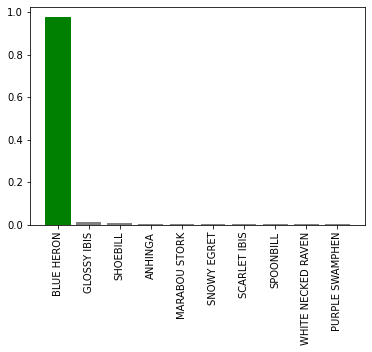

In [ ]:
fp = "/content/birds/test/ALBATROSS/2.jpg"
fp1 = "/content/birds/test/BLUE HERON/3.jpg"
fp2 = "/content/birds/test/ANHINGA/3.jpg"

img = load_and_prep(fp1) # Change filepath
pred = model_1.predict(tf.expand_dims(img, axis=0))
labels_ = np.array(labels)

# Find the top 10 prediction confidence indexes
top_10_pred_indexes = pred[0].argsort()[-10:][::-1]
# Find the top 10 prediction confidence values
top_10_pred_values = pred[0][top_10_pred_indexes]
# Find the top 10 prediction labels
top_10_pred_labels = labels_[top_10_pred_indexes]

pred_label = labels[int(pred.argmax(axis=1))]
true_label = fp1.split("/")[4] # Change filepath

# Setup plot
top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                   top_10_pred_values, 
                   color="grey")
plt.xticks(np.arange(len(top_10_pred_labels)),
           labels=top_10_pred_labels,
           rotation="vertical")

# Change color of true label
if np.isin(true_label, top_10_pred_labels):
  top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
else:
  pass

## Function for confusion graph

In [ ]:
# Creating a function for the same we did above
def pred_plot_conf(filepath, model=model_1, labels=labels):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for the given filepath.
  """
  # getting the variables ready
  img = load_and_prep(filepath)
  pred = model.predict(tf.expand_dims(img, axis=0))
  labels_ = np.array(labels)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred[0].argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred[0][top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = labels_[top_10_pred_indexes]
  
  # labels
  pred_label = labels[int(pred.argmax(axis=1))]
  true_label = filepath.split("/")[4]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

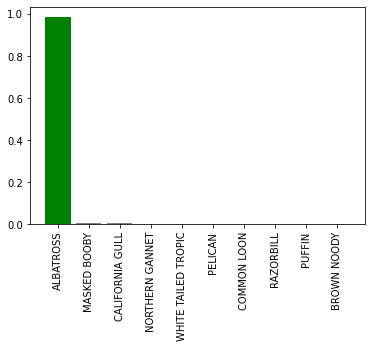

In [ ]:
# Checking the function
fp = "/content/birds/test/ALBATROSS/2.jpg"
pred_plot_conf(fp)

## Insights with confusion graph

Plotting image with confusion graph, predictions, actual label and prediction probability. 

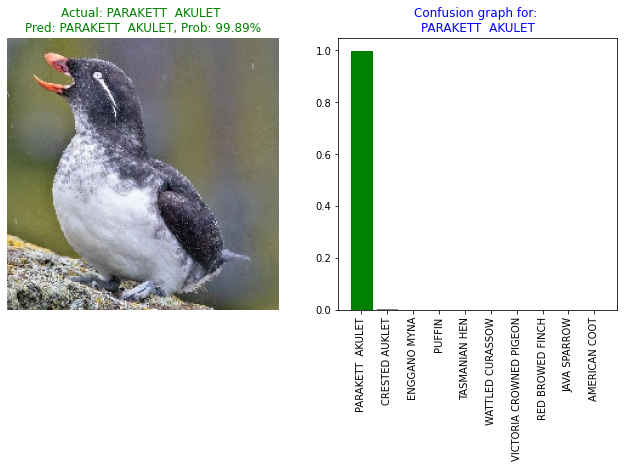

In [ ]:
# Plotting image with conf graph
random_test_fp = random.choice(test_filepaths)

img = load_and_prep(random_test_fp)
pred = model_1.predict(tf.expand_dims(img, axis=0))
labels_ = np.array(labels)

prediction_prob = f"{pred.max() * 100:.2f}"
pred_label = labels[int(pred.argmax(axis=1))]
true_label = random_test_fp.split("/")[4]

plt.figure(figsize=(11, 5))
# Plotting the image
plt.subplot(1, 2, 1)
plt.imshow(img/255)
plt.axis(False)
c = "green" if true_label == pred_label else "red"
plt.title(f"Actual: {true_label} \nPred: {pred_label}, Prob: {prediction_prob}%", color=c);

# Plotting the confusion graph
plt.subplot(1, 2, 2)
pred_plot_conf(random_test_fp)
plt.title(f"Confusion graph for: \n{true_label}", color="blue");

In [ ]:
# Functionalizing the above plot
def plot_img_conf(filepath, model=model_1, label=labels):
  """
  Plots the confusion graph and image along with 
  prediction probabilites.
  """
  img = load_and_prep(filepath)
  pred = model.predict(tf.expand_dims(img, axis=0))
  labels_ = np.array(labels)

  prediction_prob = f"{pred.max() * 100:.2f}"
  pred_label = labels[int(pred.argmax(axis=1))]
  true_label = filepath.split("/")[4]

  plt.figure(figsize=(11, 5))
  # Plotting the image
  plt.subplot(1, 2, 1)
  plt.imshow(img/255)
  plt.axis(False)
  c = "green" if true_label == pred_label else "red"
  plt.title(f"Actual: {true_label} \nPred: {pred_label}, Prob: {prediction_prob}%", color=c)

  # Plotting the confusion graph
  plt.subplot(1, 2, 2)
  pred_plot_conf(filepath)
  plt.title(f"Confusion graph for: \n{true_label}", color="blue");

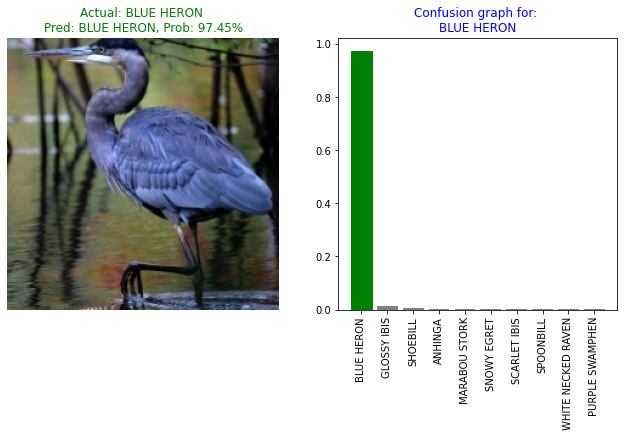

In [ ]:
# Checking the function
plot_img_conf(fp1)

In [ ]:
def img_pred(filepath, model=model_1, labels=labels):
  """
  plots the image with actual class, pred class
  and pred probability
  """
  img = load_and_prep(filepath)
  pred = model.predict(tf.expand_dims(img, axis=0))
  labels_ = np.array(labels)

  prediction_prob = f"{pred.max() * 100:.2f}"
  pred_label = labels[int(pred.argmax(axis=1))]
  true_label = filepath.split("/")[4]

  plt.imshow(img/255)
  plt.axis(False)
  c = "green" if true_label == pred_label else "red"
  plt.title(f"Actual: {true_label} \nPred: {pred_label}, Prob: {prediction_prob}%", color=c);

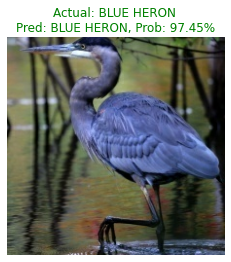

In [ ]:
img_pred(fp1)

## Insights with confusion graphs for multiple images

Visualizing multiple plots with confusion graph

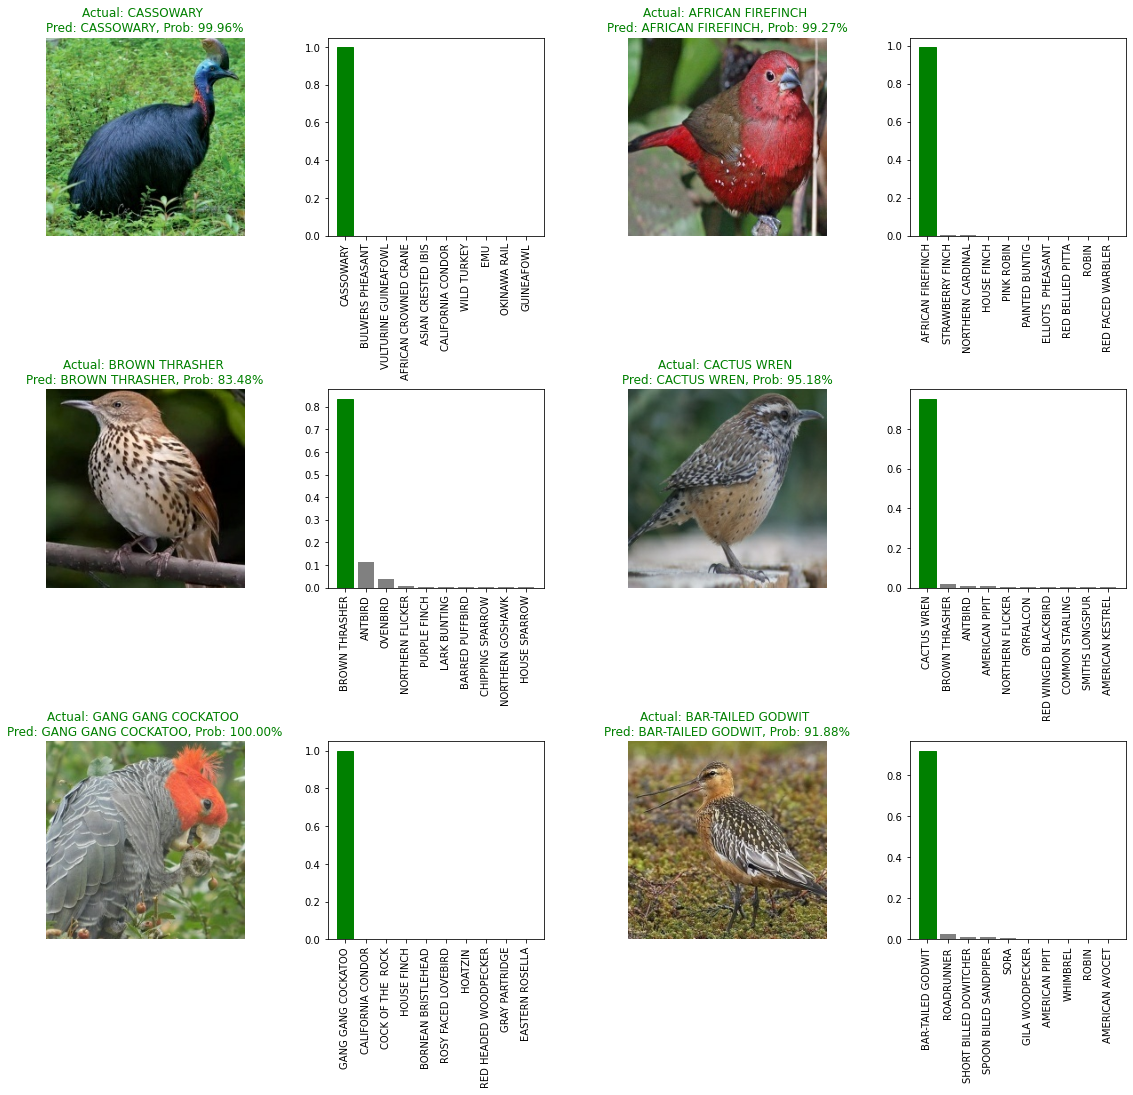

In [ ]:
plt.figure(figsize=(16, 15))
for i in range(1, 12, 2):
  rfp = random.choice(test_filepaths)
  # plotting image
  plt.subplot(3, 4, i)
  img_pred(rfp)
  
  # plotting conf graph
  plt.subplot(3, 4, i+1)
  pred_plot_conf(rfp)

plt.tight_layout(h_pad=1.0)
plt.show();

In [ ]:
df_test.head()

filepaths  ...            Pred labels
0  /content/birds/test/AFRICAN CROWNED CRANE/1.jpg  ...  AFRICAN CROWNED CRANE
1  /content/birds/test/AFRICAN CROWNED CRANE/2.jpg  ...  AFRICAN CROWNED CRANE
2  /content/birds/test/AFRICAN CROWNED CRANE/3.jpg  ...  AFRICAN CROWNED CRANE
3  /content/birds/test/AFRICAN CROWNED CRANE/4.jpg  ...  AFRICAN CROWNED CRANE
4  /content/birds/test/AFRICAN CROWNED CRANE/5.jpg  ...  AFRICAN CROWNED CRANE

[5 rows x 3 columns]

In [ ]:
true_l = np.array(true_test_arr)
pred_l = np.array(pred_labels)
check = true_l == pred_l

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
preds_prob = []
len(pred_prob[1])
for i in range(len(pred_prob)):
  preds_prob.append(pred_prob[i].max())

preds_prob[885:900]

[0.4214398,
 0.93495345,
 0.86977863,
 0.99739146,
 0.9950511,
 0.9684955,
 0.99907434,
 0.969774,
 0.9918247,
 0.9996039,
 0.565093,
 0.8035624,
 0.9875438,
 0.9774302,
 0.9018332]

## Working with wrongly predicted images

In [ ]:
fp = []
true = []
preds = []
prob_wrong = []
for i in range(len(check)):
  if not check[i]:
    fp.append(test_filepaths[i])
    true.append(true_test_arr[i])
    preds.append(pred_labels[i])
    prob_wrong.append(preds_prob[i])

In [ ]:
len(fp), len(true), len(preds), len(prob_wrong)

(23, 23, 23, 23)

In [ ]:
# Data frame for wrong predictions
df_test_wrong = pd.DataFrame({"filepaths": fp,
                              "True labels": true,
                              "Pred labels": preds,
                              "Pred prob": prob_wrong})
df_test_wrong.head()

filepaths  ... Pred prob
0              /content/birds/test/BARN OWL/2.jpg  ...  0.939433
1         /content/birds/test/BLACK SKIMMER/2.jpg  ...  0.237657
2  /content/birds/test/BLACKBURNIAM WARBLER/5.jpg  ...  0.402566
3       /content/birds/test/CALIFORNIA GULL/1.jpg  ...  0.791357
4      /content/birds/test/CRESTED NUTHATCH/1.jpg  ...  0.699400

[5 rows x 4 columns]

## Dataframe for wrong images

In [ ]:
df_test_wrong

filepaths  ... Pred prob
0               /content/birds/test/BARN OWL/2.jpg  ...  0.939433
1          /content/birds/test/BLACK SKIMMER/2.jpg  ...  0.237657
2   /content/birds/test/BLACKBURNIAM WARBLER/5.jpg  ...  0.402566
3        /content/birds/test/CALIFORNIA GULL/1.jpg  ...  0.791357
4       /content/birds/test/CRESTED NUTHATCH/1.jpg  ...  0.699400
5       /content/birds/test/CRESTED NUTHATCH/2.jpg  ...  0.977929
6         /content/birds/test/CROWNED PIGEON/2.jpg  ...  0.993989
7         /content/birds/test/CROWNED PIGEON/3.jpg  ...  0.813827
8         /content/birds/test/CROWNED PIGEON/5.jpg  ...  0.665272
9                /content/birds/test/FRIGATE/4.jpg  ...  0.679762
10        /content/birds/test/GILDED FLICKER/1.jpg  ...  0.623433
11           /content/birds/test/GREAT POTOO/1.jpg  ...  0.945877
12      /content/birds/test/HOODED MERGANSER/1.jpg  ...  0.223974
13  /content/birds/test/MALACHITE KINGFISHER/1.jpg  ...  0.902210
14  /content/birds/test/MALACHITE KINGFISHER/4.jpg  ...  0.517748
15  /content/birds/test/MALACHITE KINGFISHER/5.jpg  ...  0.642336
16       /content/birds/test/NORTHERN JACANA/5.jpg  ...  0.842543
17               /content/birds/test/PELICAN/2.jpg  ...  0.229378
18     /content/birds/test/RUFOUS KINGFISHER/3.jpg  ...  0.979517
19       /content/birds/test/SAMATRAN THRUSH/3.jpg  ...  0.169860
20       /content/birds/test/SAMATRAN THRUSH/4.jpg  ...  0.412300
21               /content/birds/test/TOUCHAN/2.jpg  ...  0.392801
22        /content/birds/test/TURKEY VULTURE/2.jpg  ...  0.553743

[23 rows x 4 columns]

In [ ]:
# Exporting to a csv file
df_test_wrong.to_csv("Wrong-preds.csv")

In [ ]:
{"filepaths": fp,
"True labels": true,
 "Pred labels": preds,
  "Pred prob": prob_wrong})

## Insights for wrong images

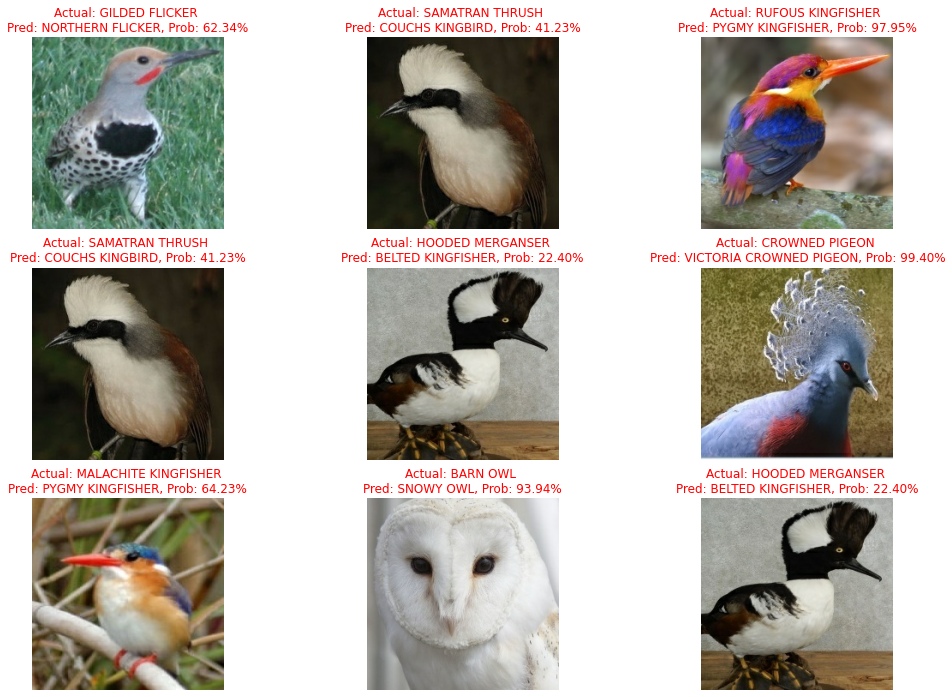

In [ ]:
# Plotting the wrong predictions 
plt.figure(figsize=(17, 12))
choice = np.random.randint(0, 23, 9)
for i in range(9):
  filepath = fp[choice[i]]
  true_label = true[choice[i]]
  pred_label = preds[choice[i]]
  pred_prob = f"{prob_wrong[choice[i]].max() * 100:.2f}"
  img = load_and_prep(filepath)

  plt.subplot(3, 3, i+1)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title(f"Actual: {true_label} \nPred: {pred_label}, Prob: {pred_prob}%", color="red");

## Insights with confusion graphs for wrong images

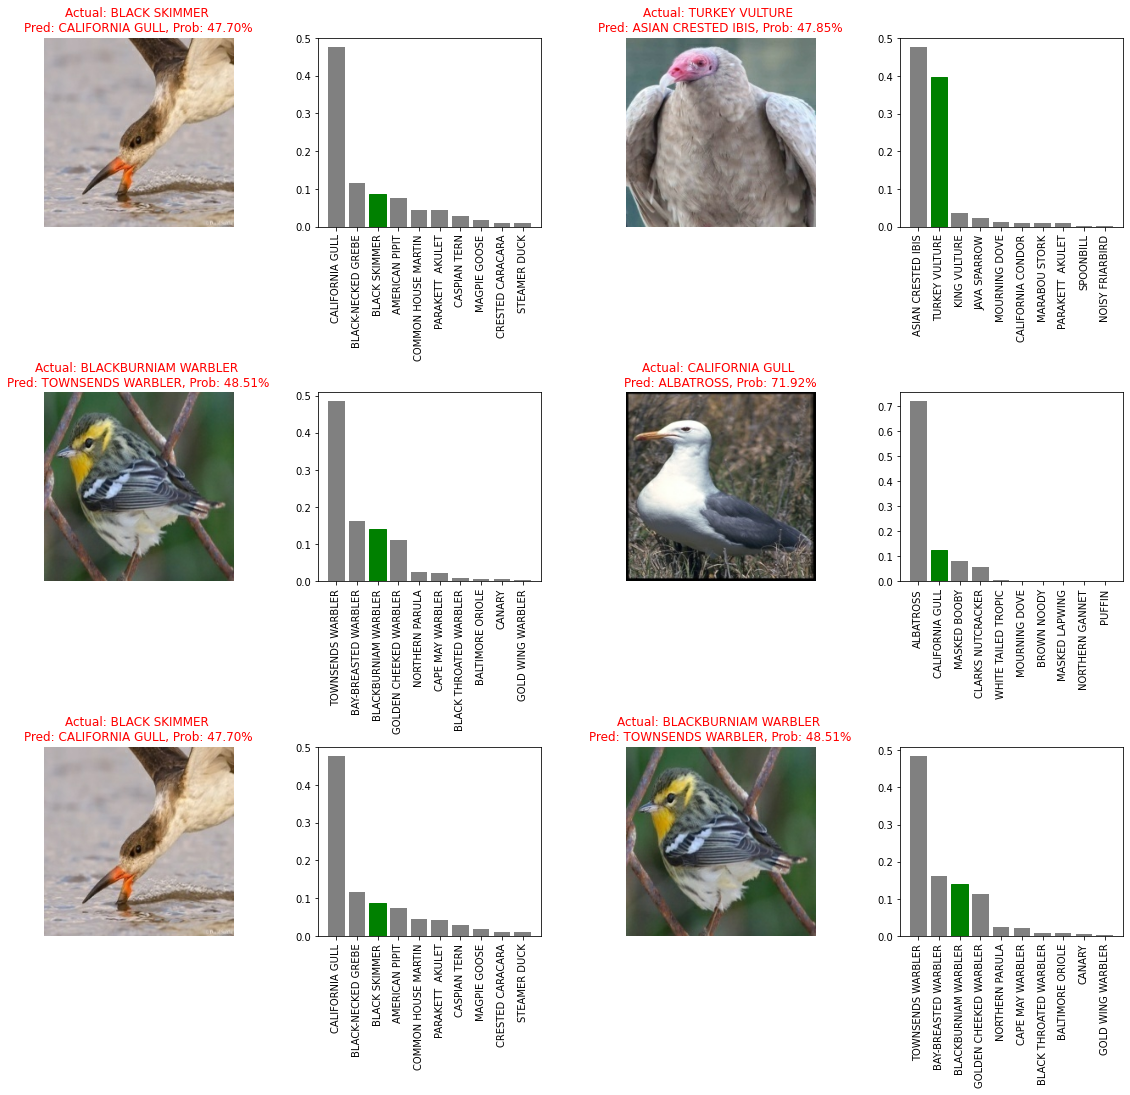

In [ ]:
# Plotting the wrong predictions with conf
wrong_fp_arr = np.random.choice(fp, 12)
plt.figure(figsize=(16, 15))
for i in range(1, 12, 2):
  rfp = wrong_fp_arr[i]
  # plotting image
  plt.subplot(3, 4, i)
  img_pred(rfp)
  
  # plotting conf graph
  plt.subplot(3, 4, i+1)
  pred_plot_conf(rfp)

plt.tight_layout(h_pad=1.0)
plt.show();